In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset

In [3]:

df1 = pd.read_csv("C:/Users/jswat/OneDrive/Desktop/SWATI/Data analytics material/Python/athlete_events.csv")

In [4]:
df2 = pd.read_csv("C:/Users/jswat/OneDrive/Desktop/SWATI/Data analytics material/Python/noc_regions.csv")

# Explore the data

In [5]:

df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
# Merging two tables
df=df1.merge(df2,how="left",on="NOC")

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
df.shape

(271116, 17)

In [11]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# DATA CLEANING

In [12]:
#Check for null values
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [13]:
#dropping the notes feature as it has a lot of null values
df.drop( 'notes' , axis=1 , inplace= True )

In [14]:
# filling the features(Age,Height ,Weight )with the mean
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df['Height'].fillna(value=df['Height'].mean(),inplace=True)
df['Weight'].fillna(value=df['Weight'].mean(),inplace=True)

In [15]:
# for region null values ,we will drop the rows which has null values
df = df.dropna(axis=0, subset=['region'])

In [47]:
# for medal null values we recognize that the winners will have either a Gold, a Silver or a Bronze . so we can fill the null values with "No prize"
df['Medal'].fillna(value="No prize", inplace=True )
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No prize,China
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No prize,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No prize,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No prize,Netherlands


In [17]:
# check for null values again
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [18]:
#to check the numerical columns is numerical( make sure that do not have string value)
for col in ['Age','Height','Weight']:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [19]:
# Now let us check if our dataset has any duplicate values
df.duplicated().sum()

1385

In [20]:
df.drop_duplicates(keep='first',inplace=True)

In [21]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No prize,China
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No prize,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No prize,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No prize,Netherlands


# EDA and Visualization

In [22]:
# Top 10 participating countries to the Olympics? in both summer and winter!
summer = df[df['Season']=='Summer'][['Team','Season']]
Top_10_summer= summer['Team'].value_counts().sort_values(ascending=False).head(10)
Top_10_summer


United States    14277
Great Britain    10169
France            9850
Italy             8004
Germany           7282
Australia         6975
Canada            6636
Japan             6213
Hungary           6034
Sweden            5773
Name: Team, dtype: int64

<AxesSubplot:title={'center':'top ten participating countries in summer'}, xlabel='countries', ylabel='Team'>

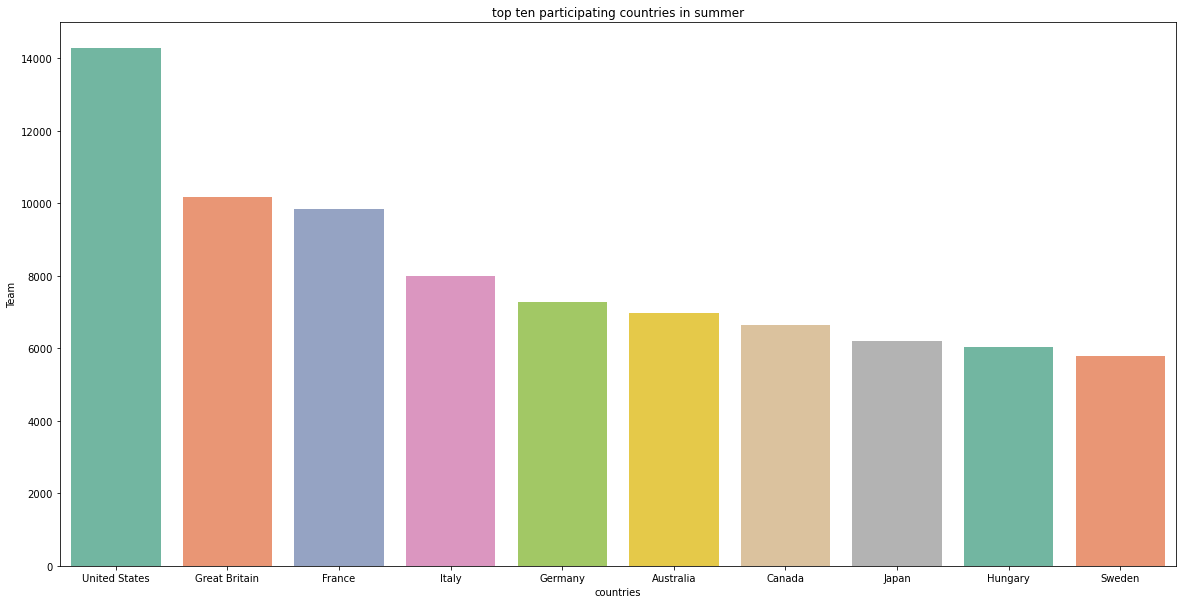

In [23]:
plt.figure(figsize=(20,10))
plt.title("top ten participating countries in summer")
plt.xlabel("countries")
plt.ylabel("no of participants")
sns.barplot(x=Top_10_summer.index, y= Top_10_summer ,palette='Set2')

In [24]:
winter = df[df['Season']=='Winter'][['Team','Season']]
Top_10_winter= winter['Team'].value_counts().sort_values(ascending=False).head(10)
Top_10_winter

United States    3321
Canada           2590
Norway           2328
Sweden           2231
Italy            2209
Japan            2056
France           1967
Austria          1954
Germany          1948
Switzerland      1911
Name: Team, dtype: int64

<AxesSubplot:title={'center':'top ten participating countries in winter'}, xlabel='countries', ylabel='Team'>

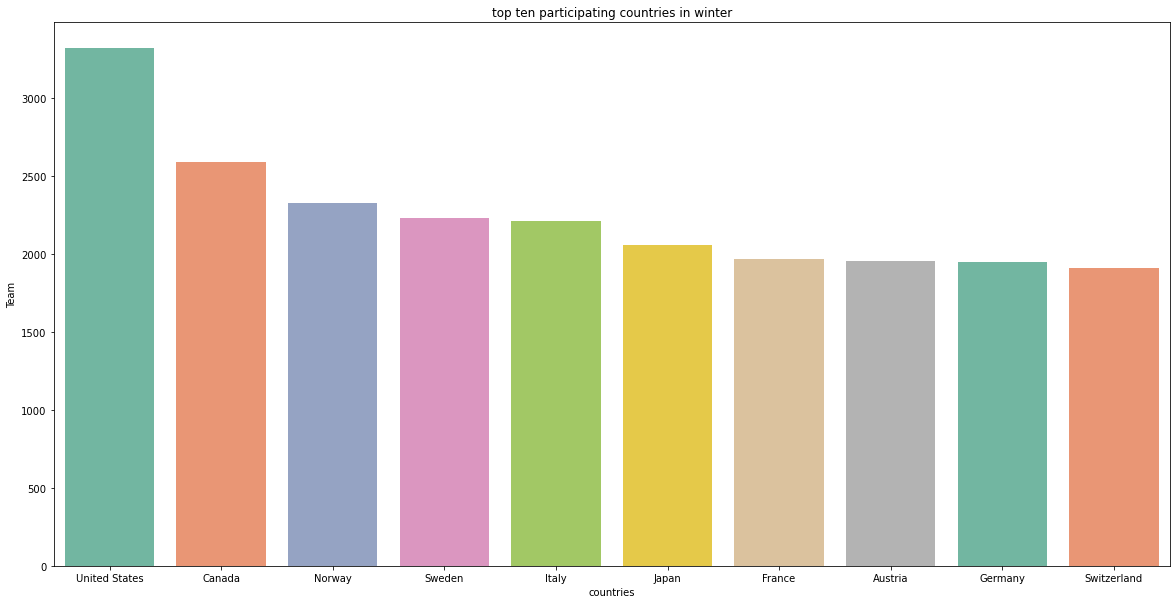

In [25]:
plt.figure(figsize=(20,10))
plt.title("top ten participating countries in winter")
plt.xlabel("countries")
plt.ylabel("no of participants")
sns.barplot(x=Top_10_winter.index, y= Top_10_winter ,palette='Set2')

In [26]:
# Top 10 participating countries win gold medal
Top_Gold=df[['Team','Medal']].copy()
Top_Gold=Top_Gold[Top_Gold['Medal']=='Gold']
Top_Gold=Top_Gold['Team'].value_counts().sort_values(ascending=False).head(10)
Top_Gold

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Top 10 countries win gold medal'}, xlabel='countries', ylabel='Team'>

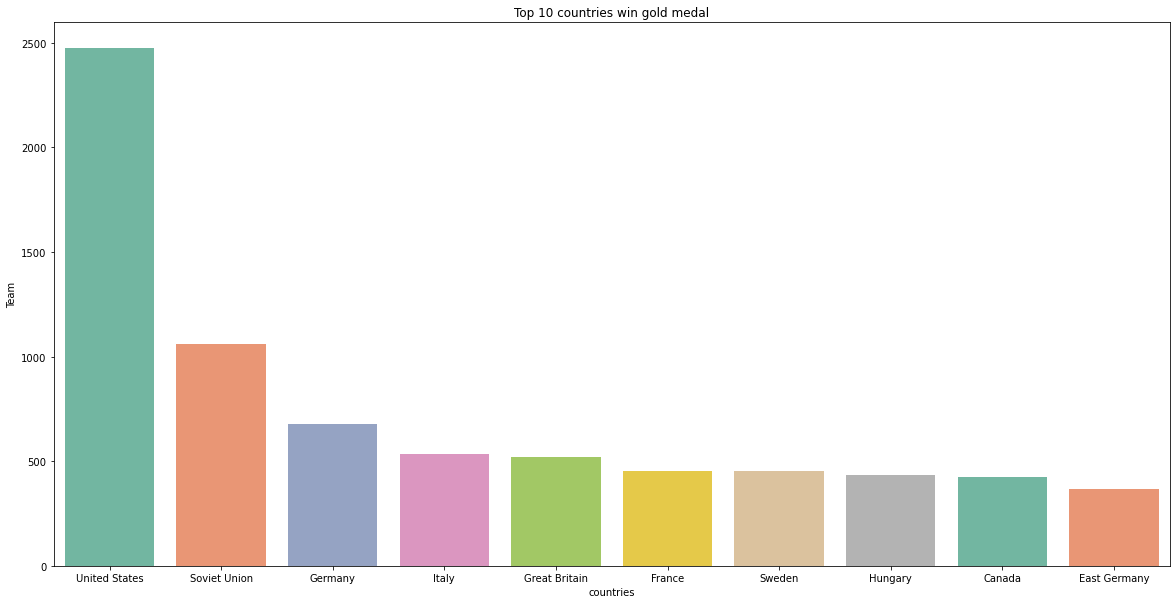

In [27]:
plt.figure(figsize=(20,10.))
plt.title("Top 10 countries win gold medal")
plt.xlabel("countries")
plt.ylabel("number of gold medal")
sns.barplot(x=Top_Gold.index ,y=Top_Gold,palette="Set2")

In [28]:
# How many times has each player in United States won the gold medal 
df[(df['Team']=='United States')&(df['Medal']=='Gold')]['Name'].value_counts()

Michael Fred Phelps, II           23
Raymond Clarence "Ray" Ewry       10
Mark Andrew Spitz                  9
Frederick Carlton "Carl" Lewis     9
Matthew Nicholas "Matt" Biondi     8
                                  ..
Anfernee Deon "Penny" Hardaway     1
Louis Joseph Harant                1
Kevin Christopher Hansen           1
Joseph "Joey" Hansen               1
Zachary "Zac" Zorn                 1
Name: Name, Length: 1781, dtype: int64

(array([1.4000e+01, 2.2000e+02, 3.0250e+03, 9.1860e+03, 1.9746e+04,
        3.4361e+04, 4.2618e+04, 5.0651e+04, 3.3639e+04, 2.5433e+04,
        1.7013e+04, 1.0996e+04, 7.0630e+03, 4.4050e+03, 2.9450e+03,
        2.1070e+03, 1.5750e+03, 1.1910e+03, 7.8100e+02, 6.8600e+02,
        4.1400e+02, 3.7200e+02, 2.2300e+02, 1.7300e+02, 1.3000e+02,
        1.1500e+02, 8.1000e+01, 5.4000e+01, 4.4000e+01, 2.8000e+01,
        3.1000e+01, 2.2000e+01, 7.0000e+00, 5.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

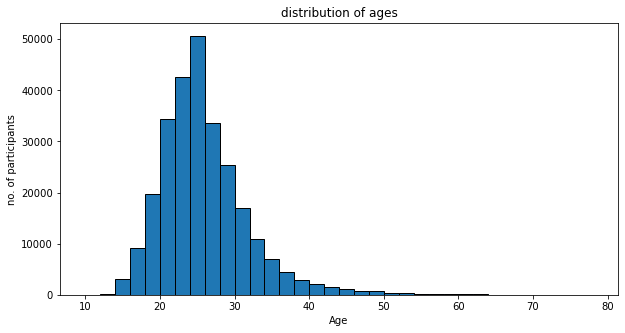

In [29]:
# what is Most age group participate
plt.figure(figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('no. of participants')
plt.title('distribution of ages')
plt.hist(df['Age'],bins=np.arange(10,80,2),edgecolor='Black')

In [30]:
# what kind of sports in both summer and winter 


In [31]:
df[df['Season']=='Winter']['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [32]:
df[df['Season']=='Summer']['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [37]:
# Which gender is more involved
gender_counts=df['Sex'].value_counts()
gender_counts

M    195119
F     74242
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'gender_counts'}, xlabel='type', ylabel='Sex'>

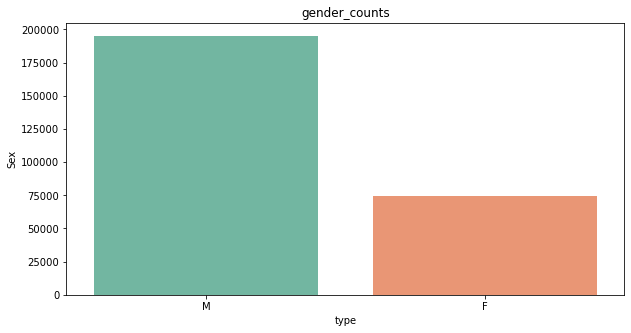

In [40]:
plt.figure(figsize=(10,5))
plt.xlabel('type')
plt.title('gender_counts')
sns.barplot(x=gender_counts.index,y=gender_counts,palette='Set2')


In [41]:
# Total number of female athletes in each olympics
Female_participants = df[df["Sex"]=="F"][['Sex','Year']]
Female_participants=Female_participants.groupby('Year').count().reset_index()
Female_participants.head(10)

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,251
7,1928,424
8,1932,287
9,1936,528


In [42]:
Female_participants.set_index('Year' , inplace=True)
Female_participants.head(10)

,Sex
Year,
1900,33
1904,16
1906,11
1908,47
1912,87
1920,134
1924,251
1928,424
1932,287


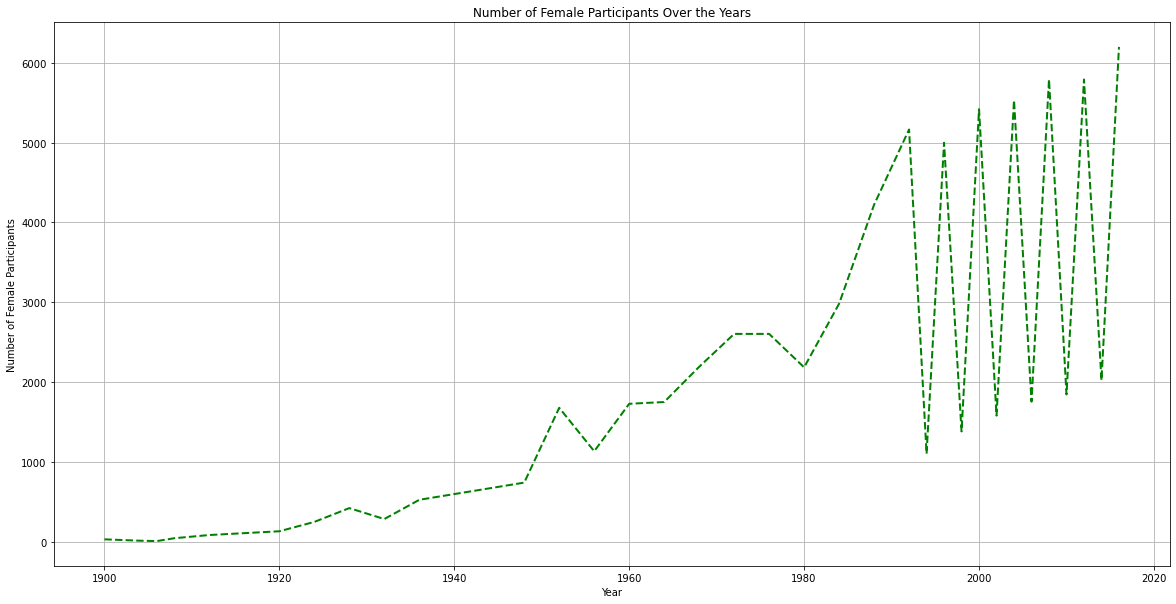

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(Female_participants.index, Female_participants['Sex'], color='green', linewidth=2, linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Female Participants')
plt.title('Number of Female Participants Over the Years')
plt.grid(True)  # Adding grid lines for better readability
plt.show()

In [44]:
# How many participants over the age of 60 got the gold medal
((df['Medal']=='Gold')&(df['Age']>60)).value_counts()

False    269355
True          6
dtype: int64

In [62]:
# Top 5 countries with medals
total_medal = df[df['Medal'] != 'No prize']['region'].value_counts().reset_index(name='medal').head(5)
total_medal


,index,medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2067
4,France,1767


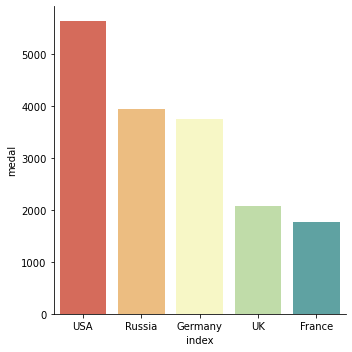

In [68]:
sns.catplot(x='index',y='medal',data=total_medal,palette='Spectral',kind='bar')